In [1]:
import torch
import torch.nn as nn
import torchvision

def create_resnet50_model(seed:int=42):
    # Load pretrained weights
    weights = torchvision.models.ResNet50_Weights.DEFAULT
    transforms = weights.transforms()

    # Load model with pretrained weights
    model = torchvision.models.resnet50(weights=weights)

    # Freeze all parameters
    for param in model.parameters():
        param.requires_grad = False

    # Set seed for reproducibility
    torch.manual_seed(seed)

    # Replace the final fully connected layer
    model.fc = nn.Sequential(
        nn.Dropout(0.2),
        nn.Linear(2048, 1)
    )

    return model, transforms


In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [4]:
resnet_model , _= create_resnet50_model(seed=42)
state_dict = torch.load("/content/best_model.pth" , map_location=device)
resnet_model.load_state_dict(state_dict)
resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [7]:
resnet_model.to(device)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

Predicted age: 10.35


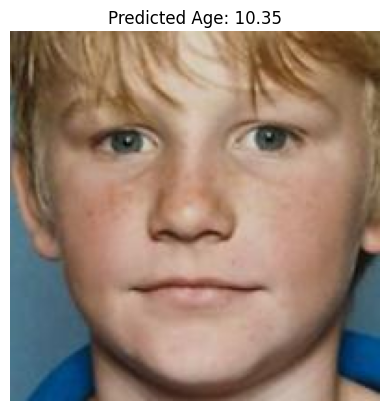

In [11]:
import torch
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt


# ✅ Image transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ✅ Load image and prepare input
img = Image.open('/content/test.jpg').convert("RGB")
input_tensor = transform(img).unsqueeze(0).to(device)

# ✅ Predict
with torch.no_grad():
    output = resnet_model(input_tensor).squeeze().item()

print(f"Predicted age: {output:.2f}")

plt.imshow(img)
plt.title(f"Predicted Age: {output:.2f}")
plt.axis('off')
plt.show()
